# Задание 4: Pipeline аугментаций

In [ ]:
import utils
import os
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
import utils.augmentation_pipeline as pipeline
import time
from utils import custom_augmentations
from utils import extra_augmentations
from PIL import Image
from typing_extensions import Literal

In [3]:
dataset = utils.CustomImageDataset("data/train", transform=None, target_size=(224, 224))

## Light конфигурация

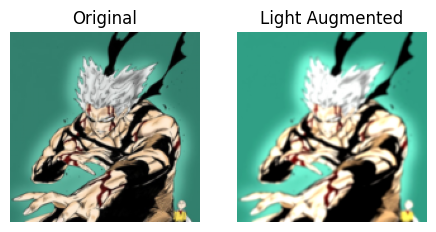

In [ ]:
light_pipeline = pipeline.AugmentationPipeline()
light_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="GaussianBlur",
        augmentation=custom_augmentations.RandomGaussianBlur(p=0.8),
        input_type=pipeline.InputType.TENSOR,
    )
)
light_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="RandomBrightnessContrast",
        augmentation=custom_augmentations.RandomBrightnessContrast(p=0.8),
        input_type=pipeline.InputType.IMAGE,
    )
)
light_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="AutoContrast",
        augmentation=extra_augmentations.AutoContrast(p=0.8),
        input_type=pipeline.InputType.TENSOR,
    )
)
light_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="RandomBrightnessContrast",
        augmentation=custom_augmentations.RandomBrightnessContrast(p=0.8),
        input_type=pipeline.InputType.TENSOR,
    )
)
image, label = dataset[11]
utils.show_images(
    [image, light_pipeline.apply(image)],
    ["Original", "Light Augmented"],
    images_in_row=2,
    size=150,
)

## Medium конфигурация

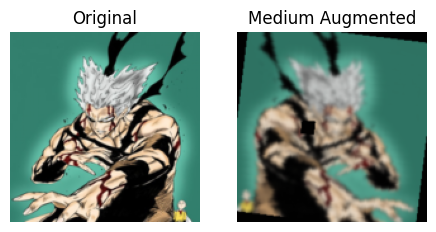

In [ ]:
medium_pipeline = pipeline.AugmentationPipeline()
medium_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="GaussianBlur",
        augmentation=custom_augmentations.RandomGaussianBlur(p=0.8),
        input_type=pipeline.InputType.TENSOR,
    )
)
medium_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="ColorJitter",
        augmentation=transforms.ColorJitter(),
        input_type=pipeline.InputType.TENSOR,
    )
)
medium_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="ElasticTransform",
        augmentation=extra_augmentations.ElasticTransform(p=0.8, alpha=30, sigma=5),
        input_type=pipeline.InputType.TENSOR,
    )
)
medium_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="CutOut",
        augmentation=extra_augmentations.CutOut(p=0.8),
        input_type=pipeline.InputType.TENSOR,
    )
)
medium_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="RandomHorizontalFlip",
        augmentation=transforms.RandomHorizontalFlip(p=0.8),
        input_type=pipeline.InputType.TENSOR,
    )
)
medium_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="Grayscale",
        augmentation=transforms.RandomRotation(degrees=10),
        input_type=pipeline.InputType.TENSOR,
    )
)
medium_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="RandomBrightnessContrast",
        augmentation=custom_augmentations.RandomBrightnessContrast(p=0.8),
        input_type=pipeline.InputType.TENSOR,
    )
)
image, label = dataset[11]
utils.show_images(
    [image, medium_pipeline.apply(image)],
    ["Original", "Medium Augmented"],
    images_in_row=2,
    size=150,
)

## Heavy конфигурация

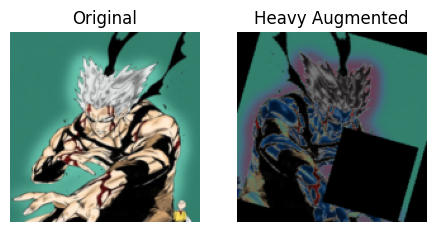

In [ ]:
heavy_pipeline = pipeline.AugmentationPipeline()
heavy_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="GaussianBlur",
        augmentation=custom_augmentations.RandomGaussianBlur(p=0.8),
        input_type=pipeline.InputType.TENSOR,
    )
)
heavy_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="ElasticTransform",
        augmentation=extra_augmentations.ElasticTransform(p=0.8, alpha=30, sigma=5),
        input_type=pipeline.InputType.TENSOR,
    )
)
heavy_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="RandomErasingCustom",
        augmentation=extra_augmentations.RandomErasingCustom(p=0.8),
        input_type=pipeline.InputType.TENSOR,
    )
)
heavy_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="RandomHorizontalFlip",
        augmentation=transforms.RandomHorizontalFlip(p=0.8),
        input_type=pipeline.InputType.TENSOR,
    )
)
heavy_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="RandomRotation",
        augmentation=transforms.RandomRotation(degrees=50),
        input_type=pipeline.InputType.TENSOR,
    )
)
heavy_pipeline.add_augmentation(
    pipeline.Augmentation(
        name="Solarize",
        augmentation=extra_augmentations.Solarize(),
        input_type=pipeline.InputType.TENSOR,
    )
)
image, label = dataset[11]
utils.show_images(
    [image, heavy_pipeline.apply(image)],
    ["Original", "Heavy Augmented"],
    images_in_row=2,
    size=150,
)

## Преобразование train датасета

In [ ]:
root_dir = "data/train"
save_dir = (
    "../../results/augmentation_pipeline/{pipeline_type}/{class_name}/{image_name}"
)


def transform_dataset(
    apply_pipeline: pipeline.AugmentationPipeline,
    pipeline_type: Literal["light", "medium", "heavy"],
):
    classes = sorted(
        [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
    )
    for class_name in classes:
        class_dir = os.path.join(root_dir, class_name)
        os.makedirs(
            save_dir.format(
                pipeline_type=pipeline_type, class_name=class_name, image_name=""
            ),
            exist_ok=True,
        )
        for f in os.listdir(class_dir):
            if not f.endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
                continue
            image_path = os.path.join(class_dir, f)
            image = Image.open(image_path).convert("RGB")
            F.to_pil_image(apply_pipeline.apply(F.to_tensor(image))).save(
                save_dir.format(
                    pipeline_type=pipeline_type, image_name=f, class_name=class_name
                )
            )

In [ ]:
time_start = time.time()
transform_dataset(light_pipeline, "light")
print(
    f"Трансформация light pipeline завершена за {time.time() - time_start:.3f} секунд"
)
time_start = time.time()
transform_dataset(medium_pipeline, "medium")
print(
    f"Трансформация medium pipeline завершена за {time.time() - time_start:.3f} секунд"
)
time_start = time.time()
transform_dataset(heavy_pipeline, "heavy")
print(
    f"Трансформация heavy pipeline завершена за {time.time() - time_start:.3f} секунд"
)

Трансформация light pipeline завершена за 12.508 секунд
Трансформация medium pipeline завершена за 19.844 секунд
Трансформация heavy pipeline завершена за 20.122 секунд
